## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. Load Dataset
df = pd.read_excel("https://raw.githubusercontent.com/Matiin-heidari/churn-prediction/main/data.xlsx")
# df = pd.read_excel("customer_churn_data.xlsx")
print("Data Shape:", df.shape)

Data Shape: (5630, 20)


In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002.0,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003.0,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004.0,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005.0,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5628 non-null   float64
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5628 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5628.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52814.549041,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,532.401057
std,1624.890759,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,18842.837049
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51407.750000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52814.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.330000
75%,54221.250000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.422500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,999999.000000


In [ ]:
# df_clean = df_raw.copy()
# df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

In [ ]:
# for column in df.columns:
#         if column not in ['customerID', 'tenure', 'Churn', 'WarehouseToHome']:
#                 print("Column: {} - Unique Values: {}".format(column, df[column].unique()))
#                 print("="*80)

In [6]:
# Null Values Check
print("Missing values:\n", df.isnull().sum())

Missing values:
 CustomerID                       2
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           2
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [7]:
# Split by type
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Fill numeric with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Fill categorical with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

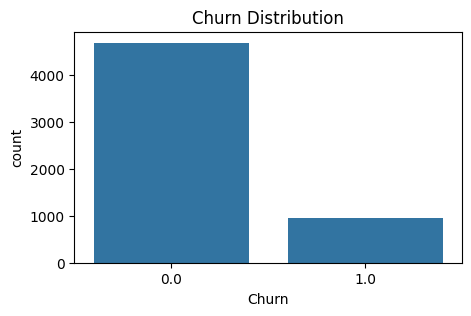

In [8]:
# Target variable balance
plt.figure(figsize=(5, 3))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

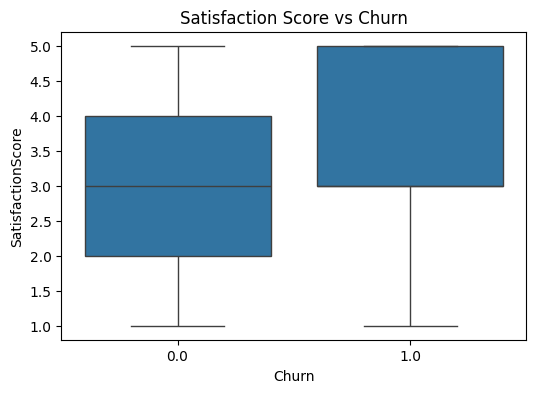

In [9]:
# Churn by Satisfaction Score
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='SatisfactionScore')
plt.title("Satisfaction Score vs Churn")
plt.show()

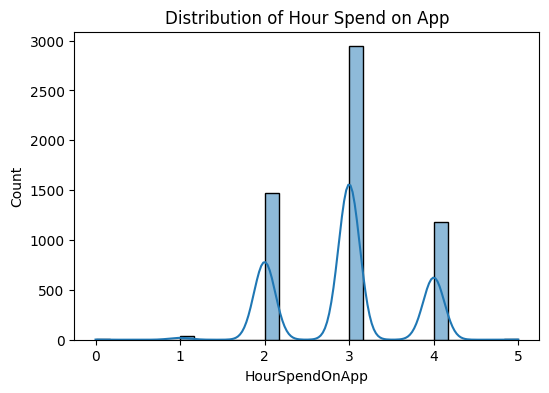

In [10]:
# Distribution of Hours Spent
plt.figure(figsize=(6, 4))
sns.histplot(df['HourSpendOnApp'], bins=30, kde=True)
plt.title("Distribution of Hour Spend on App")
plt.show()

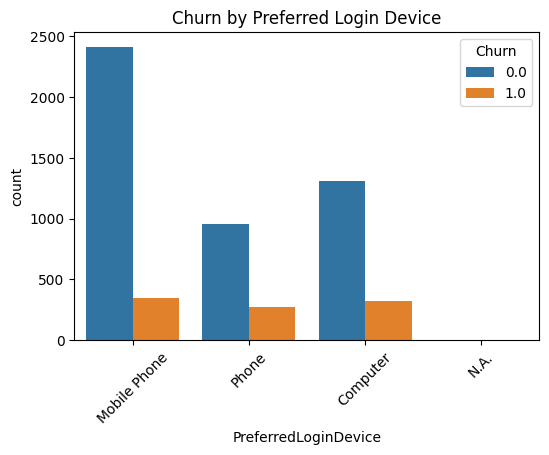

In [11]:
# Churn by Preferred Login Device
plt.figure(figsize=(6, 4))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title("Churn by Preferred Login Device")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Encode Categorical Features
cat_cols = df.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [13]:
# 6. Drop Identifier Column
df.drop(['CustomerID'], axis=1, inplace=True)

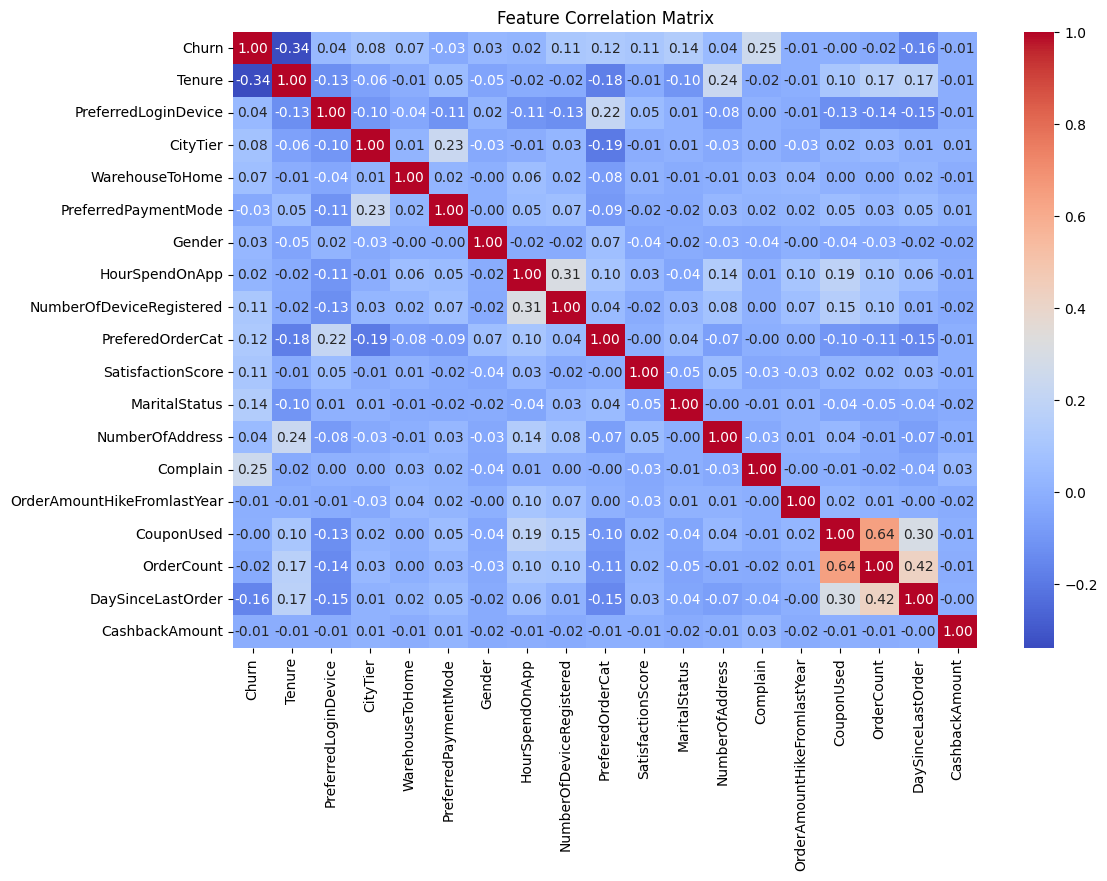

In [14]:
# Correlation Plot
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [15]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Models

In [18]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_log))


Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       941
         1.0       0.76      0.45      0.57       185

    accuracy                           0.89      1126
   macro avg       0.83      0.71      0.75      1126
weighted avg       0.88      0.89      0.87      1126



In [19]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       941
         1.0       0.99      0.92      0.96       185

    accuracy                           0.99      1126
   macro avg       0.99      0.96      0.97      1126
weighted avg       0.99      0.99      0.99      1126



In [20]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost:\n", classification_report(y_test, y_pred_xgb))


XGBoost:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       941
         1.0       0.98      0.90      0.94       185

    accuracy                           0.98      1126
   macro avg       0.98      0.95      0.96      1126
weighted avg       0.98      0.98      0.98      1126



## ROC-AUC Scores

In [21]:
print("ROC-AUC Logistic Regression:", roc_auc_score(y_test, y_pred_log))
print("ROC-AUC Random Forest:", roc_auc_score(y_test, y_pred_rf))
print("ROC-AUC XGBoost:", roc_auc_score(y_test, y_pred_xgb))

ROC-AUC Logistic Regression: 0.7126805870695351
ROC-AUC Random Forest: 0.9589281098314043
ROC-AUC XGBoost: 0.9492259528391304


## Feature Importance (Random Forest)

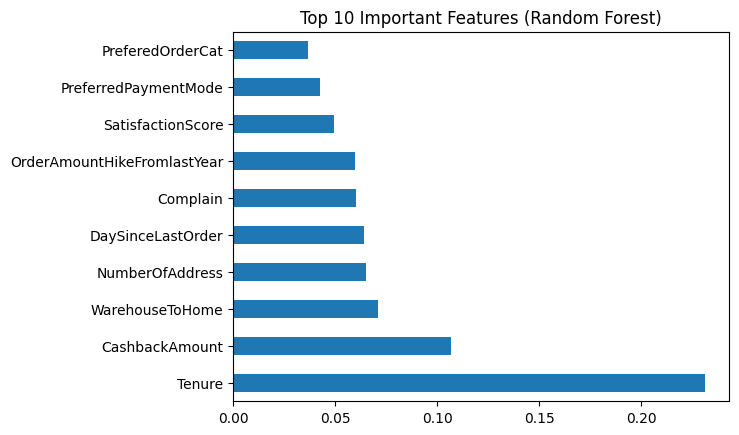

In [22]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


## Save Best Model

In [ ]:
import joblib
joblib.dump(rf, 'best_churn_model.pkl')
